# Activity 1.2 : Training Neural Networks


Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2025-2026
  |  
<u>**Hands-on Activity 2** | Training Neural Networks
**Name** | Corpuz, Micki Laurren B.
**Section** | CPE32S3
**Date Performed**: | 08 January 2026
**Date Submitted**: | 12 January 2026
**Instructor**: | Engr. Neal Barton James Matira

<hr>

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [3]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [4]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [5]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
592,3,132,80,0,0,34.4,0.402,44,1
665,1,112,80,45,132,34.8,0.217,24,0
405,2,123,48,32,165,42.1,0.520,26,0
636,5,104,74,0,0,28.8,0.153,48,0
507,1,130,60,23,170,28.6,0.692,21,0


In [6]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [7]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [9]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



Normalize the data

In [10]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [11]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

c:\Users\micki\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary 

In [12]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [13]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5642 - loss: 0.7572 - val_accuracy: 0.5521 - val_loss: 0.7713
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5816 - loss: 0.7421 - val_accuracy: 0.5677 - val_loss: 0.7564
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 0.7280 - val_accuracy: 0.5833 - val_loss: 0.7426
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5990 - loss: 0.7150 - val_accuracy: 0.5677 - val_loss: 0.7297
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6163 - loss: 0.7028 - val_accuracy: 0.5677 - val_loss: 0.7177
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6302 - loss: 0.6914 - val_accuracy: 0.5781 - val_loss: 0.7066
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6424 - loss: 0.6809 - val_accuracy: 0.5781 - val_loss: 0.6963
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6406 - loss: 0.6710 - val_accuracy: 0.5938 - 

In [14]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.
# Get probabilities
y_pred_prob_nn = model.predict(X_test_norm)

# Convert to class labels (threshold at 0.5)
y_pred_class_nn = (y_pred_prob_nn > 0.5).astype("int32")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [15]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn[:10]

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [16]:
y_pred_prob_nn[:10]

array([[0.5050883 ],
       [0.46568492],
       [0.273704  ],
       [0.222173  ],
       [0.12905511],
       [0.41963178],
       [0.04720566],
       [0.3124254 ],
       [0.7646269 ],
       [0.29099536]], dtype=float32)

Create the plot_roc function

In [17]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.740
roc-auc is 0.816


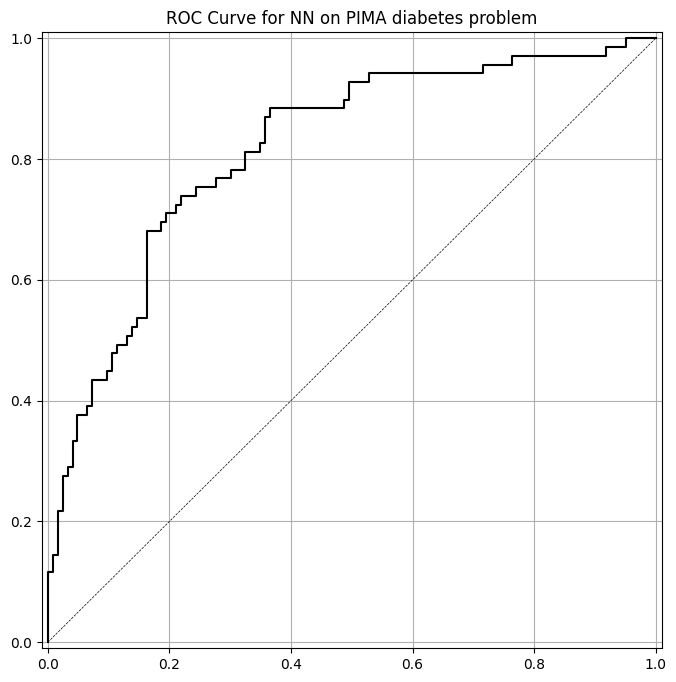

In [18]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn)))

plot_roc(y_test, y_pred_prob_nn, 'NN')

> Figure above shows how well the neural network with single layer of 12 nodes classify the data. With a score of 81.3%, the model was good in separating positive classes (diabetic cases) and negative classes (non-diabetic cases). This is well represented by the ROC curve that is top-left hugging the TPR, more far away than the guessing line.

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [19]:
run_hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

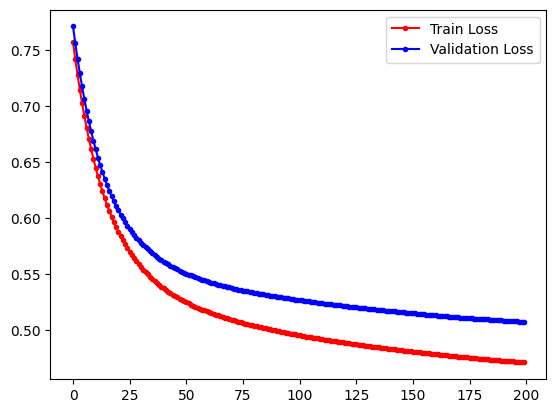

In [20]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

> The figure above shows the difference in how the model performs on training vs. validation. As epochs increase, the training loss keeps dropping, while the validation loss also decreases but stays higher. The widening gap between the two curves means the model is learning patterns from the training data more strongly than it generalizes to unseen validation data. While this shows improvement, this shows a sign of overfitting creeping in.


#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [21]:
model_1 = Sequential([
    # Hidden Layers
    Dense(units=6, input_shape= (8,), activation="relu"),
    Dense(units= 6, activation="relu"),
    # Output Layer
    Dense(units=1, activation="sigmoid")
])

model_1.summary()

c:\Users\micki\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_1.compile(
    optimizer=SGD(learning_rate=0.003),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [23]:
run_hist_1 = model_1.fit(
    x= X_train_norm,
    y= y_train,
    validation_data=(X_test_norm, y_test),
    epochs=1500,
    verbose=0
)

In [24]:
y_pred_prob_nn_1 = model_1.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype("int32")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [25]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.776
roc-auc is 0.821


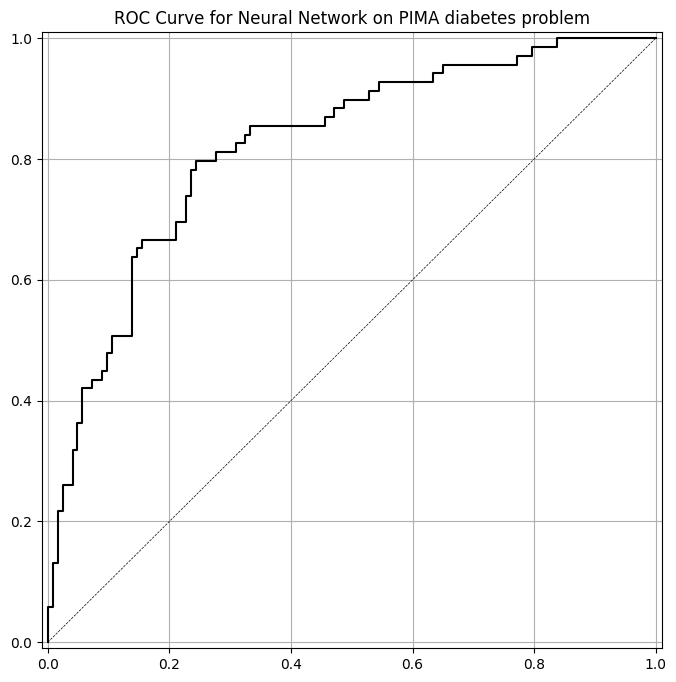

In [26]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'Neural Network')

> The figure above shows the performance of a 2‑layer, 6‑nodes neural network on the same diabetes dataset. While there was no significant changes in the characteristic of the ROC curve, the reduced ROC‑AUC score signals weaker discrimination between diabetic and non‑diabetic cases compared to the earlier model.

In [27]:
print(run_hist_1.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


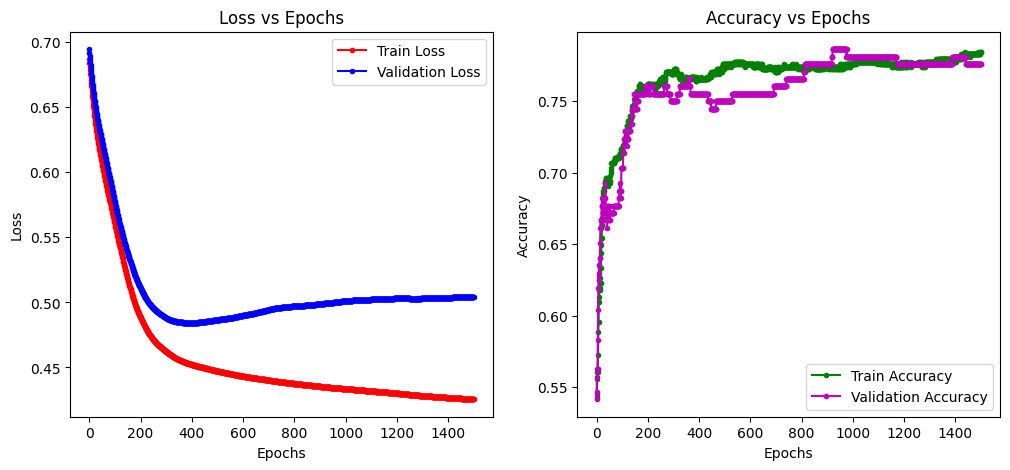

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# -- Loss Plot --
ax1.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax1.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax1.set_title("Loss vs Epochs")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

# -- Accuracy Plot --
ax2.plot(run_hist_1.history["accuracy"], 'g', marker='.', label="Train Accuracy")
ax2.plot(run_hist_1.history["val_accuracy"], 'm', marker='.', label="Validation Accuracy")
ax2.set_title("Accuracy vs Epochs")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

plt.tight_layout
plt.show()

> The figure above compares loss and accuracy of the neural network. Adding another layer did not improve generalization. Train loss keeps dropping and train accuracy climbs as epochs go on. But this is not the case for validation: the curve stays higher until it shifts gradually upward, signalling wrongness of prediction worsen as it iterates more than 200 epochs. Similarly, increased epochs did not improve validation accuracy as well. The gap between train and validation curves widens, showing the model is learning training data well but failing to improve on unseen cases. 


--- **Different Learning Rates** ---

In [29]:
learning_rates = [0.001, 0.003, 0.01]
histories_lr = {}

for lr in learning_rates:
    model_lr = Sequential([
        Dense(6, input_shape=(8,), activation="relu"),
        Dense(6, activation="relu"),
        Dense(1, activation="sigmoid")
    ])

    model_lr.compile(
        optimizer=SGD(learning_rate=lr),
        loss= "binary_crossentropy",
        metrics=["accuracy"]
    )

    histories_lr[lr] = model_lr.fit(
        X_train_norm,
        y_train,
        validation_data=(X_test_norm, y_test),
        epochs=500,
        verbose=0
    )

c:\Users\micki\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


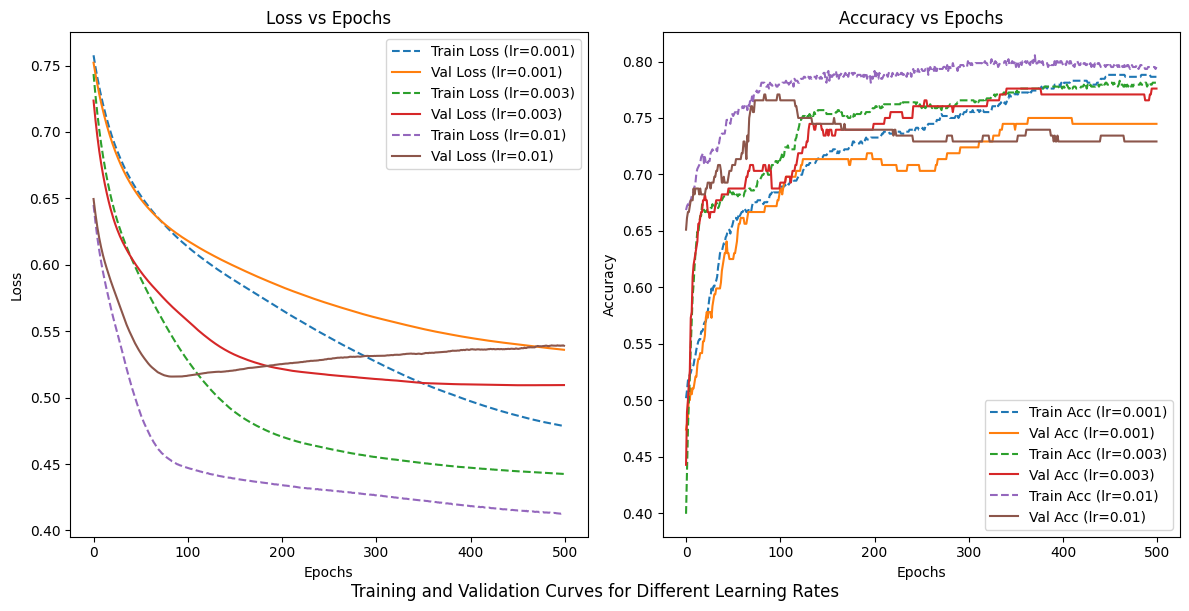

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Plot Loss (Train + Validation)
for lr, hist in histories_lr.items():
    ax1.plot(hist.history["loss"], label=f"Train Loss (lr={lr})", linestyle="--")
    ax1.plot(hist.history["val_loss"], label=f"Val Loss (lr={lr})")
ax1.set_title("Loss vs Epochs")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

# Plot Accuracy (Train + Validation)
for lr, hist in histories_lr.items():
    ax2.plot(hist.history["accuracy"], label=f"Train Acc (lr={lr})", linestyle="--")
    ax2.plot(hist.history["val_accuracy"], label=f"Val Acc (lr={lr})")
ax2.set_title("Accuracy vs Epochs")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

plt.tight_layout()
fig.suptitle("Training and Validation Curves for Different Learning Rates", y=0.02)
plt.show()

**Interpretation for Variations in Learning Rates**
> The figure above compares validation loss and accuracy across different learning rates. At 0.001, the model learns slow but steady: loss drops gradually and accuracy climbs smooth.  At 0.003, training is better stabilized than validation: validation starts to deviate slightly on higher epochs. At 0.01, the model jumps around: loss spikes and accuracy fluctuates, signalling overfitting. Overall, neither lower(underfitting) or higher(overfitting) rate not help; the mid‑range rate gave the most consistent performance.



--- **Different Network Structures** ---

In [31]:
structures = {
    # Dual hidden layer of 6 nodes
    '6-6': [6, 6],
    '12-6': [12, 6],
    '12-12': [12, 12]
}

histories_struct = {}

for name, layers in structures.items():
    model_st = Sequential()
    model_st.add(Dense(layers[0], input_shape=(8,), activation="relu"))
    model_st.add(Dense(layers[1], activation="relu"))
    model_st.add(Dense(1, activation="sigmoid"))

    model_st.compile(
        optimizer=SGD(learning_rate=0.003),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    histories_struct[name] = model_st.fit(
        X_train_norm, y_train,
        validation_data=(X_test_norm, y_test),
        epochs=500,
        verbose=0
    )

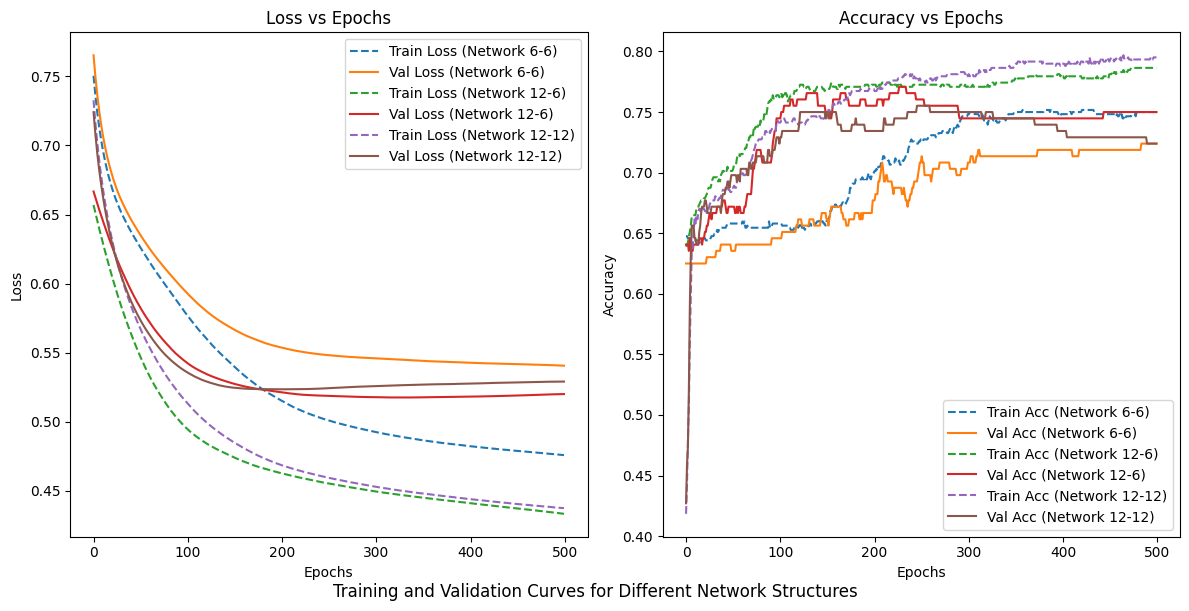

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Plot Loss (Train + Validation)
for names, hist in histories_struct.items():
    ax1.plot(hist.history["loss"], label=f"Train Loss (Network {names})", linestyle="--")
    ax1.plot(hist.history["val_loss"], label=f"Val Loss (Network {names})")
ax1.set_title("Loss vs Epochs")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

# Plot Accuracy (Train + Validation)
for names, hist in histories_struct.items():
    ax2.plot(hist.history["accuracy"], label=f"Train Acc (Network {names})", linestyle="--")
    ax2.plot(hist.history["val_accuracy"], label=f"Val Acc (Network {names})")
ax2.set_title("Accuracy vs Epochs")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

plt.tight_layout()
fig.suptitle("Training and Validation Curves for Different Network Structures", y=0.02)
plt.show()

**Interpretation for Variations in Network Structures**
> The figure above compares validation loss and accuracy across different network structures. Network 6‑6, the model learns steadily but not greatly: loss drops and accuracy stabilizes but generalization is limited (underfitting). Network 12‑6, training is better and accuracy rises higher: validation curves still plateau, showing only slight improvement. Network 12‑12, training and validation performances are significantly off: the model fits training data strongly but validation loss stays higher and accuracy fluctuates  (overfitting). Overall, adding more nodes and layers did not improve validation performance, with mid‑sized structures giving the most balanced results.


**Interpretation for Variations in Number of Epochs**
> The figure above shows that stopping early misses improvements in loss and accuracy. But pushing epochs higher does not help either. For bigger structures and higher learning rates, longer training only destabilizes: curves wobble, shift, and validation performance drops. More epochs do not guarantee better results.

### Conclusion

> In this activity, different learning rates, network structures, and numbers of epochs were tested. This showed that low learning rates learn slow but steady, mid‑range rates balance speed and stability, and high rates destabilize training. Network structures with more nodes or layers did not guarantee better generalization, with mid‑sized setups giving the most consistent results. Changing epochs revealed that stopping too early misses improvements, while too many only cause overfitting and unstable curves. Validation curves exposed the limits of generalization compared to training performance.

---

##### Challenge (try making a function for scalability)

In [50]:
def build_model(learning_rate, nodes, hidden_layers, input_data):
    mdl = Sequential()
    # First hidden
    mdl.add(Dense(nodes, input_shape=(input_data.shape[1],)))
    for i in range(hidden_layers-1):
        # Additional hidden layers
        mdl.add(Dense(nodes, activation="relu"))
    # Output layer
    mdl.add(Dense(1, activation="sigmoid"))

    mdl.compile(
        optimizer=SGD(learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return mdl
    

In [51]:
model_s = build_model(0.003, 6, 2, X_train_norm)

history = model_s.fit(
    X_train_norm,
    y_train,
    validation_data=(X_test_norm, y_test),
    epochs=1500,
    verbose=0
)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy is 0.771
roc-auc is 0.804


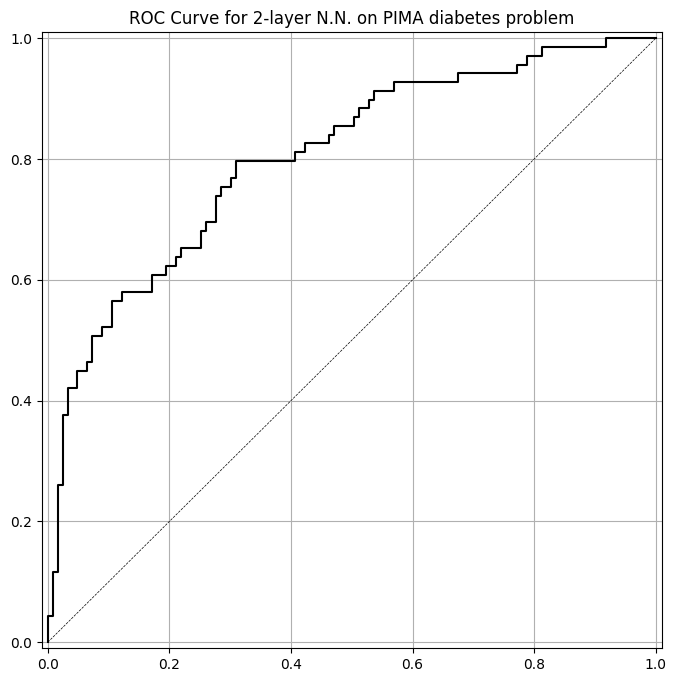

In [52]:
y_pred_prob_nn_s = model_s.predict(X_test_norm)
y_pred_class_nn_s = (y_pred_prob_nn_s > 0.5).astype("int32")

model_s_plot = plot_roc(y_test, y_pred_prob_nn_s, "2-layer N.N.")

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_s)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_s)))
model_s_plot

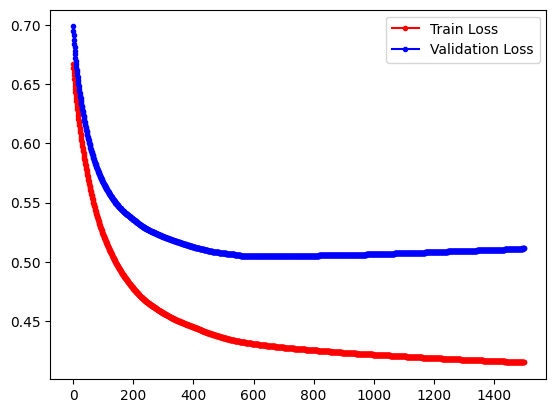

In [53]:
history.history.keys()
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#type your answer here